# Import packages

In [7]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)
    
import sys
from data_wrangling import basic_func, process_raw_data, base_processing_class, combine_info_utils, further_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis, patterns_and_features_class, compare_two_monkeys_class, monkey_landing_in_ff
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning import machine_learning_utils, hyperparameter_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from planning_analysis.only_stop_ff import only_stop_ff_utils, only_stop_ff_class, only_stop_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.variations_of_factors_vs_results import make_variations_utils, plot_variations_utils, process_variations_utils
from planning_analysis.show_planning import alt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class
from planning_analysis import ml_methods_class, ml_methods_utils
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_class, GUAT_vs_TAFT_utils

from scipy.stats import pearsonr

from importlib import reload
from non_behavioral_analysis import eye_positions
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 40

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Individual monkey patterns and statistics data

## get data

### patterns and features data

In [ ]:
bruno = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Bruno')
bruno.combine_or_retrieve_patterns_and_features(verbose=False, exists_ok=True)
schro = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Schro')
schro.combine_or_retrieve_patterns_and_features(verbose=False)

### individual monkey data

In [ ]:
### retrieve data
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_PlotTrials_args()

## barplots

### patterns

In [ ]:
bruno.plot_pattern_frequencies()

In [ ]:
schro.plot_pattern_frequencies()

### features

In [ ]:
bruno.plot_feature_statistics()

In [ ]:
schro.plot_feature_statistics()

## boxplots (features)

In [ ]:
monkey = bruno

In [ ]:
columns_of_interest = ['t', 't_last_vis', 'd_last_vis','abs_angle_last_vis', 'num_stops', 'num_stops_near_target']
titles_of_columns = {'t': 'Trial Duration',
                     't_last_vis': 'Trial Duration Since Target Last Visible',
                     'd_last_vis':'Distance of Target Since Target Last Visible',
                     'abs_angle_last_vis': 'Abs Angle of Target Boundary Since Target Last Visible',
                     'num_stops': 'Number of Stops during a Trial',
                     'num_stops_near_target': 'Number of Stops near a Target',
}
x_lables_of_columns = {'t': 'Duration in s',
                      't_last_vis': 'Duration in s',
                      'd_last_vis':'cum_distance',
                      'abs_angle_last_vis': 'Angle in radians',
                      'num_stops': 'Number of Stops',
                      'num_stops_near_target': 'Number of Stops'}

for column in columns_of_interest:
    feature_data = monkey.combd_all_trial_features[column]
    feature_data = feature_data[feature_data!=9999]
    title = titles_of_columns[column]
    x_label = x_lables_of_columns[column]
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=feature_data)
    plt.title(title, fontsize=15)
    plt.xlabel(x_label)
    plt.show()

## changes over time


### patterns

In [ ]:
bruno.plot_the_changes_in_pattern_frequencies_over_time()

### features

In [ ]:
bruno.plot_the_changes_in_feature_statistics_over_time()

### scatter 
scatter around target center

In [ ]:
for monkey in [bruno, schro]:
    for y_column_list in [['distance_mean', 'distance_50%'],
                          ['abs_angle_mean', 'abs_angle_50%'],
                          #['distance_mean', 'distance_25%', 'distance_50%', 'distance_75%']
                          ]:
        monkey.plot_the_changes_in_scatter_around_target_over_time(y_columns=y_column_list)

# Bruno vs Schro

In [234]:
tm = compare_two_monkeys_class.CompareTwoMonkeys()

In [ ]:
tm.compare_monkeys(exists_ok=True)

## success rates

### multi-ff

In [ ]:
tm.prepare_to_compare_success_rates()
tm.make_plot_to_compare_success_rates()

### single-ff

In [ ]:
single_ff = pd.DataFrame({'Bruno': [0.514, 0.570], 'Schro': [0.454, 0.475]}, index=['Mean', 'Median']).reset_index(drop=False).rename(columns={'index': 'statistic'})
single_ff = single_ff.melt(id_vars=['statistic'], value_vars=['Bruno', 'Schro'])
single_ff = single_ff.sort_values(by=['statistic']).reset_index(drop=True).rename(columns={'variable': 'monkey'})

fig = px.bar(single_ff, x='statistic', y='value', color='monkey', barmode='group', text='value', title='Mean and Median Success Ratee', width=500)  # Adjust the width as needed
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_yaxes(range=[0, max(single_ff['value']) + 0.1])
fig.show()

## barplots

### patterns

In [ ]:
tm.plot_pattern_frequencies()

### features

In [ ]:
tm.plot_feature_statistics()

## changes over time

#### patterns

In [ ]:
tm.plot_the_changes_in_pattern_frequencies_over_time()

#### features

In [ ]:
tm.plot_the_changes_in_feature_statistics_over_time()

#### scatter

In [ ]:
tm.plot_the_changes_in_scatter_around_target_over_time()

# Num stops

## barplots

In [240]:
monkey = bruno # could be schro too

### during trial

In [ ]:
plot_statistics.plot_num_stops_in_histogram(monkey.combd_all_trial_features, 'num_stops')
plt.title('Number of Stops During a Trial')
plt.show()


### since target last visible

In [ ]:
plot_statistics.plot_num_stops_in_histogram(monkey.combd_all_trial_features, 'num_stops_since_last_vis')
plt.title('Number of Stops Since Target Last Visible')
plt.show()


### near target

In [ ]:
plot_statistics.plot_num_stops_near_target_in_barplot(monkey.combd_all_trial_features)

## scatterplots (vs. cum_distance/distance/time)

Cum_distance: Integrate the speed of the monkey during the trial. 

Distance: Find the absolute distance between two targets. Discard the trials where the monkey has gone to a border

### whole trial

In [ ]:
data_item.make_distance_and_num_stops_df()

#### regular

In [ ]:
for x_column in ['distance', 'cum_distance']:
    df_sub = data_item.num_stops_df[data_item.num_stops_df[x_column] < 2000]
    plot_statistics.fit_and_plot_linear_regression(df_sub[x_column].values, df_sub['num_stops'].values, show_regression = True)
    plt.title(f'Numbers of stops vs. {x_column}')
    plt.xlabel(f'{x_column}', labelpad=15)
    plt.ylabel('Numbers of Stops')
    plt.show()

#### remove num_stops=0

In [ ]:
for x_column in ['distance', 'cum_distance']:
    df_sub = data_item.num_stops_df[data_item.num_stops_df[x_column] < 2000]
    df_sub = df_sub[df_sub['num_stops'] > 0]
    plot_statistics.fit_and_plot_linear_regression(df_sub[x_column].values, df_sub['num_stops'].values, show_regression = True)
    plt.title(f'Numbers of stops vs. {x_column}')
    plt.xlabel(f'{x_column}', labelpad=15)
    plt.ylabel('Numbers of Stops')
    plt.show()


### since target last visible

In [ ]:
max_cluster_distance = 75

data_item.make_or_retrieve_target_cluster_df(exists_ok=False)
target_clust_last_vis_df = data_item.target_cluster_df

num_stops = organize_patterns_and_features.get_num_stops_array(data_item.monkey_information, 
                                                                np.arange(len(data_item.ff_caught_T_new)))

num_stops_since_last_vis = organize_patterns_and_features._calculate_num_stops_since_last_vis(data_item.monkey_information, 
                                                                                                      len(data_item.ff_caught_T_new), 
                                                                                                      target_clust_last_vis_df['time_since_last_vis'].values)

num_stops_near_target = organize_patterns_and_features._calculate_num_stops_near_target(data_item.monkey_information, data_item.ff_caught_T_new,
                                                                                        data_item.ff_real_position_sorted, max_cluster_distance)

target_clust_last_vis_df = organize_patterns_and_features.add_num_stops_to_target_last_vis_df(target_clust_last_vis_df, data_item.ff_caught_T_new, num_stops, num_stops_near_target, num_stops_since_last_vis)
target_last_vis_df = organize_patterns_and_features.add_num_stops_to_target_last_vis_df(target_last_vis_df, data_item.ff_caught_T_new, num_stops, num_stops_near_target, num_stops_since_last_vis)

#### target last visible

In [ ]:
plot_statistics.plot_last_seen_info_vs_stops(target_last_vis_df)

#### target cluster last visible

In [ ]:
plot_statistics.plot_last_seen_info_vs_stops(target_clust_last_vis_df)

# Num ffs

In [236]:
monkey = bruno 
# monkey = schro

### visible

Number of visible ffs at any point

In [ ]:
plot_statistics.plot_number_of_visible_ff_per_point_in_histogram(data_item.ff_dataframe)

### in memory

Number of ffs in memory at any point

In [ ]:
plot_statistics.plot_number_of_ff_in_memory_per_point_in_histogram(data_item.ff_dataframe)

### alive ff around tagret

In [ ]:
plot_statistics.plot_num_ff_around_target_in_barplot(monkey.combd_all_trial_features)

### in a row

In [ ]:
plot_statistics.plot_num_ff_caught_in_a_row_in_barplot(monkey.combd_pattern_frequencies, show_one_in_a_row = False)

In [ ]:
plot_statistics.plot_num_ff_caught_in_a_row_in_pie_chart(monkey.agg_pattern_frequencies)

# Compare target with non_target

Take out points where both targets and non-targets are either visible or in memory

In [ ]:
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_angle')
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_angle_boundary')
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_distance')

Take out points where both targets and non-targets are visible

In [ ]:
ff_dataframe_subset = data_item.ff_dataframe[data_item.ff_dataframe['visible']==1]
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_angle')
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_angle_boundary')
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_distance')

# Plot ff caught time

## Bruno

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0219/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0219/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


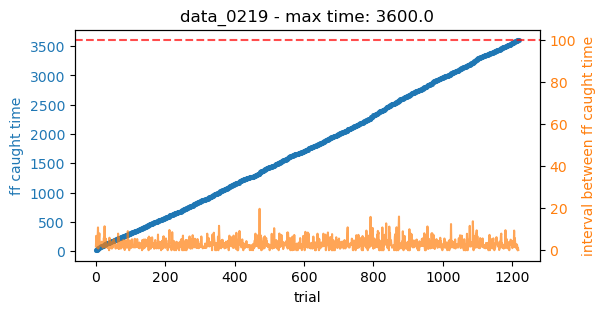

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0220/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0220/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


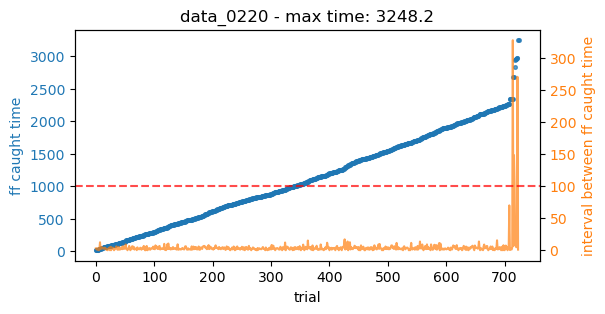

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0221
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0221/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0221/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


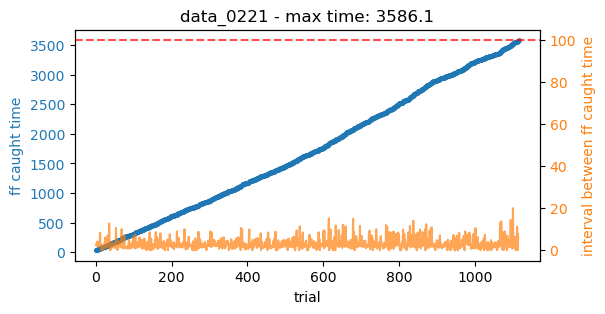

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0222
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0222/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0222/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


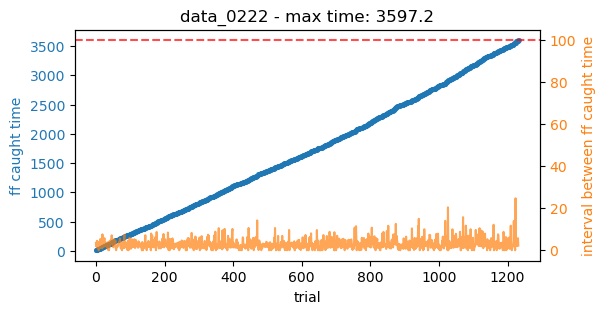

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0226
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0226/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0226/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


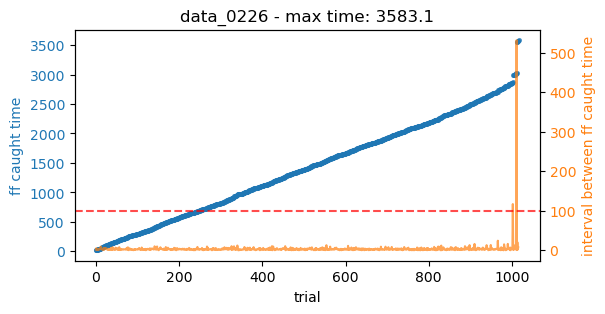

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0227
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0227/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0227/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


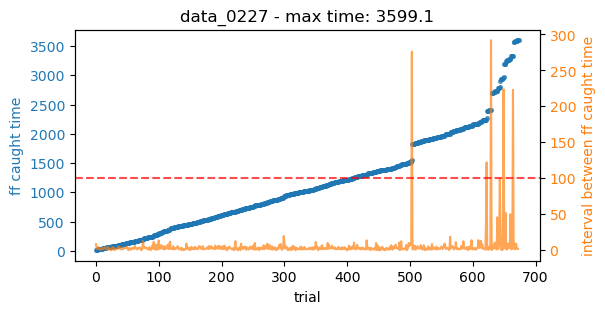

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0228
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0228/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0228/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


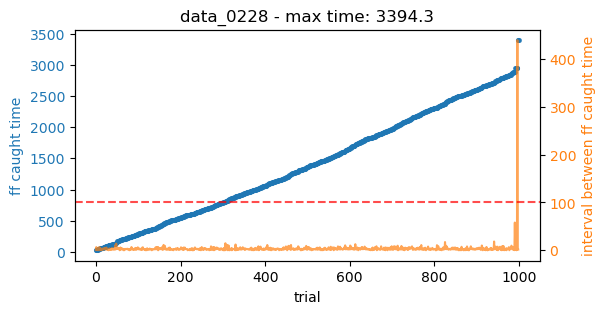

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0301
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0301/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0301/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


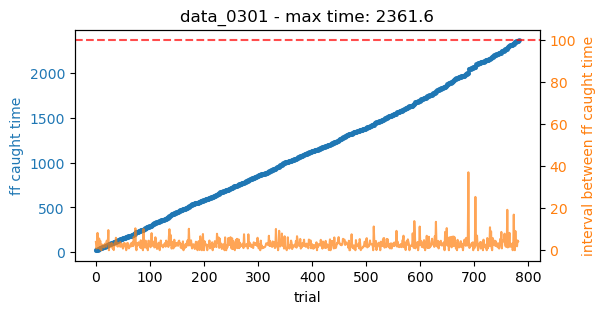

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0306
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0306/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0306/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


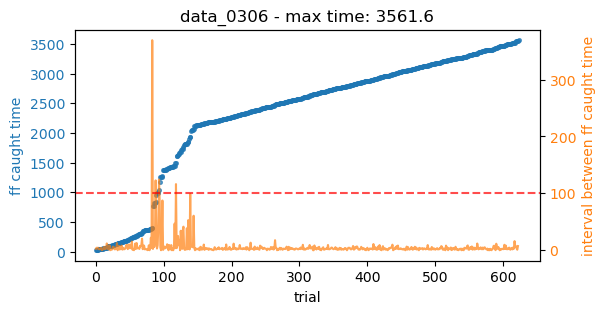

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0307
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0307/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0307/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


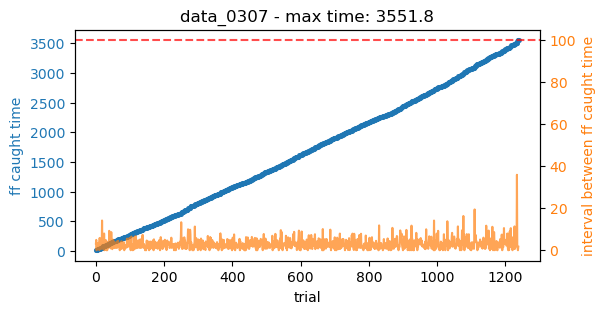

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0308
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0308/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0308/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


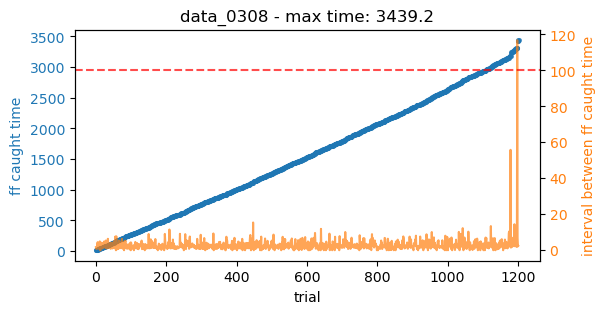

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0309
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0309/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0309/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


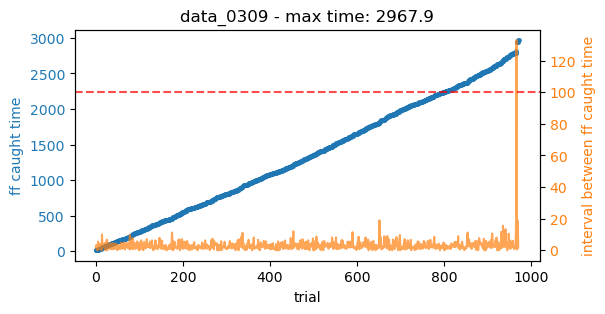

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0312/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0312/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


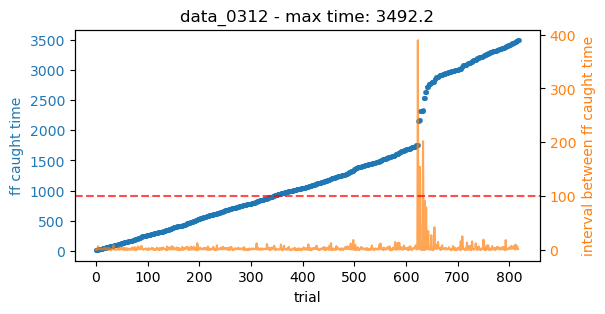

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0314/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


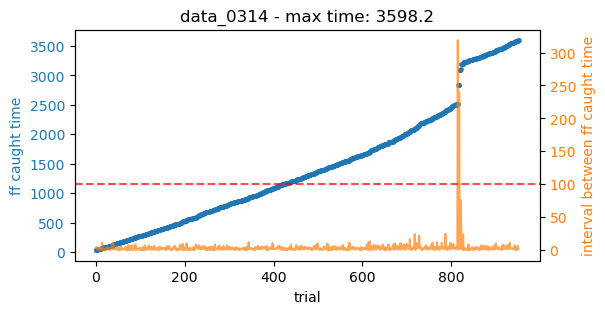

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0315
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0315/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0315/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


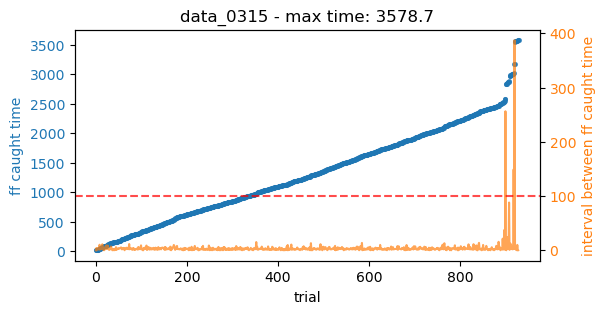

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0316/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0316/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


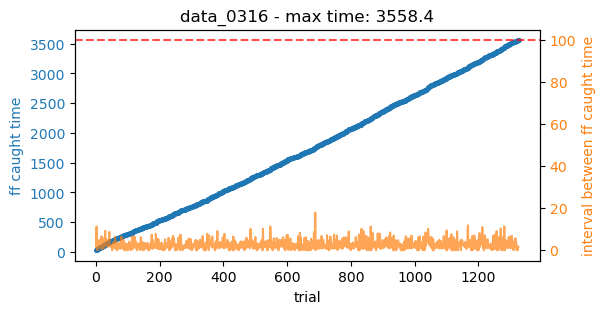

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0321
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0321/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0321/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


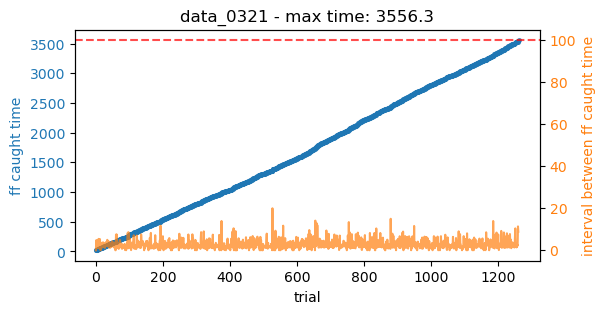

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0322/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0322/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


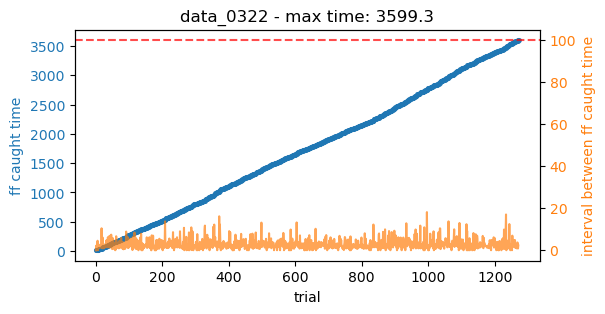

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0323
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0323/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0323/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


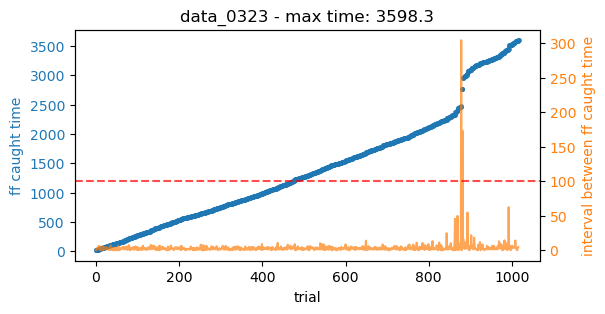

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0326/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0326/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


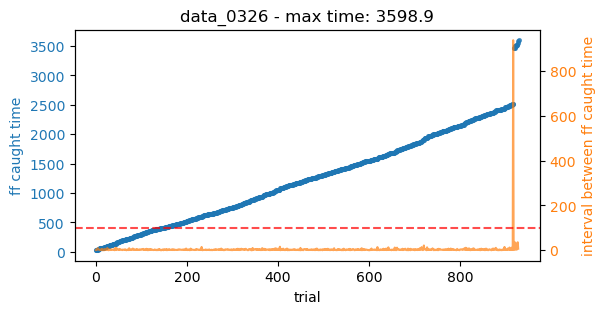

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0327/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0327/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


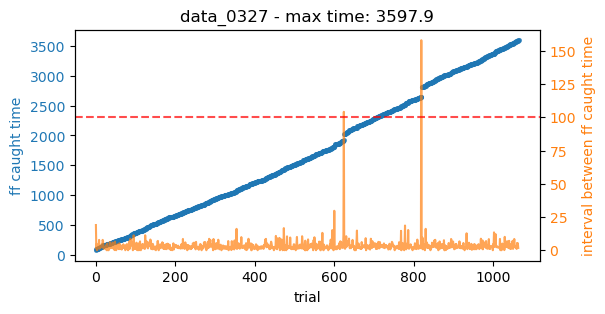

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0328/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


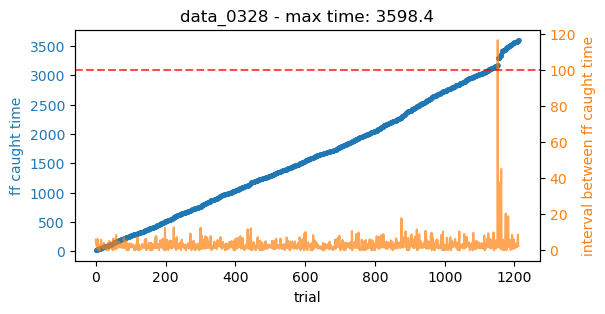

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0329
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0329/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0329/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


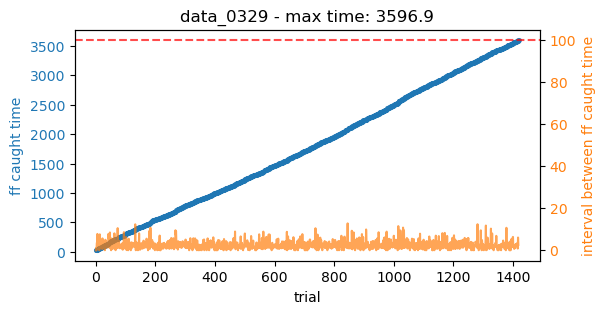

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0330/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


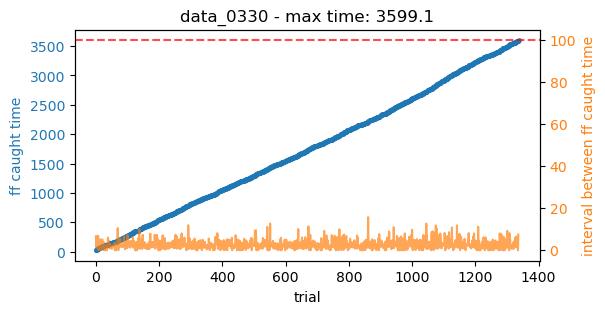

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0402
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Bruno/data_0402/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Bruno/data_0402/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


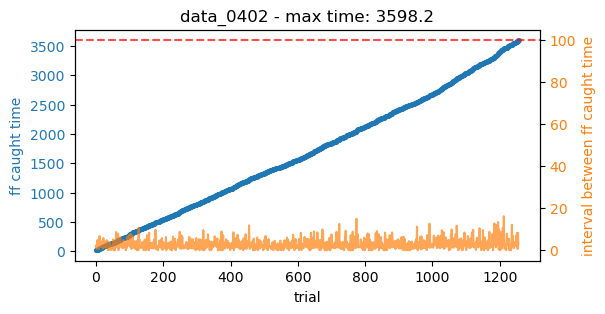

In [24]:
additional_plots.plot_ff_caught_time(monkey_name='monkey_Bruno')

## Schro

all_monkey_data/raw_monkey_data/monkey_Schro/data_0316
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0316/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0316/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


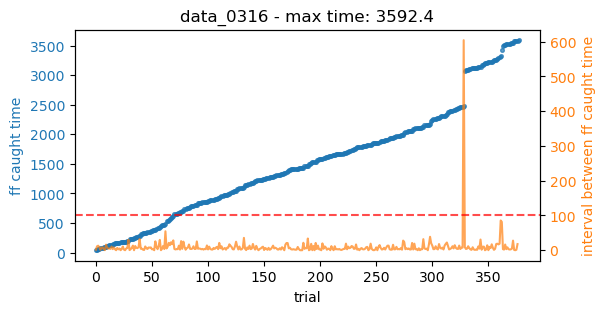

all_monkey_data/raw_monkey_data/monkey_Schro/data_0321
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0321/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0321/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


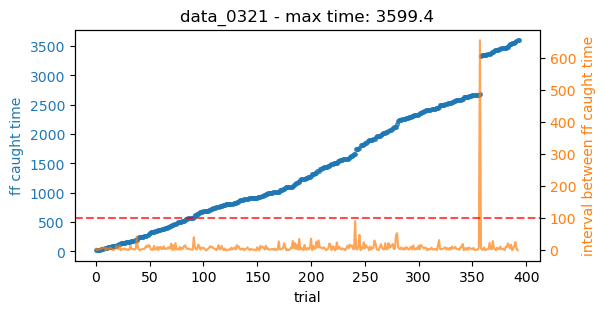

all_monkey_data/raw_monkey_data/monkey_Schro/data_0322
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0322/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0322/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


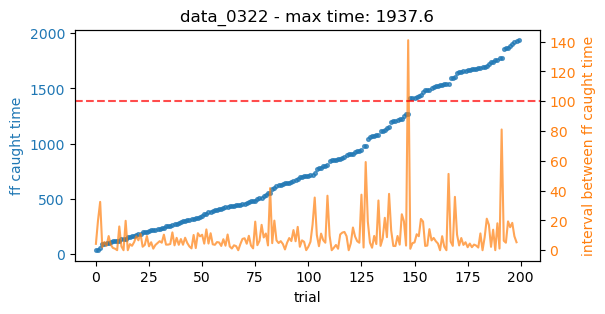

all_monkey_data/raw_monkey_data/monkey_Schro/data_0326
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0326/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0326/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


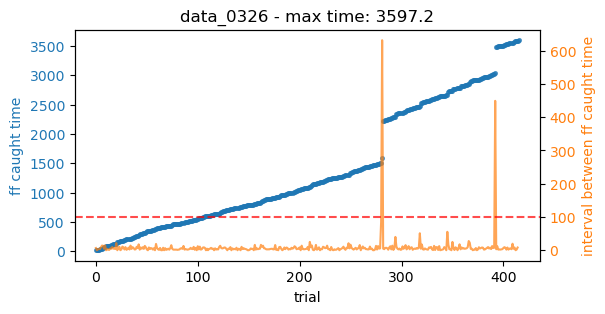

all_monkey_data/raw_monkey_data/monkey_Schro/data_0327
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0327/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0327/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


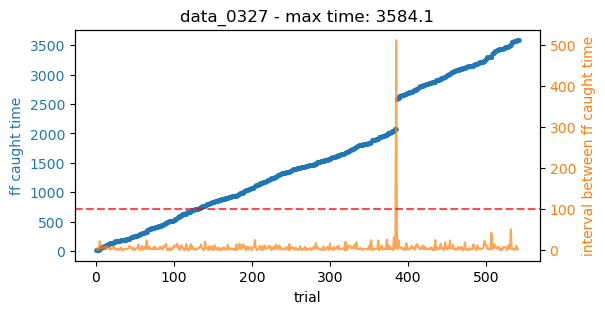

all_monkey_data/raw_monkey_data/monkey_Schro/data_0328
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0328/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0328/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


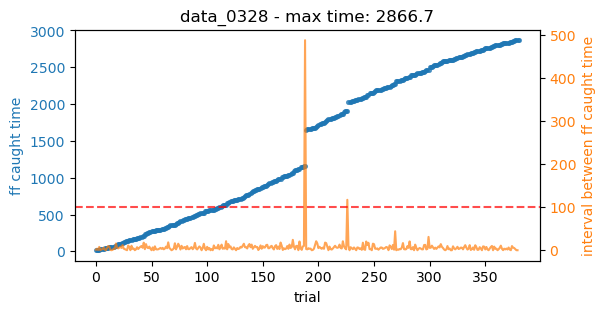

all_monkey_data/raw_monkey_data/monkey_Schro/data_0329
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0329/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0329/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


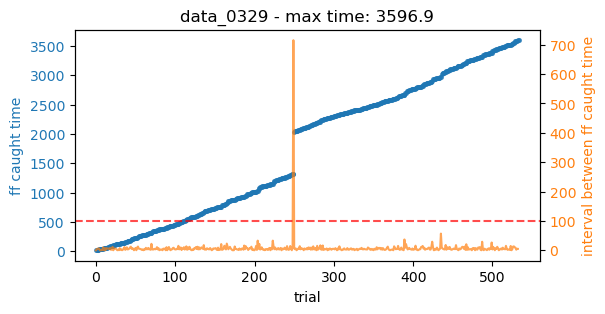

all_monkey_data/raw_monkey_data/monkey_Schro/data_0402
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0402/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0402/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


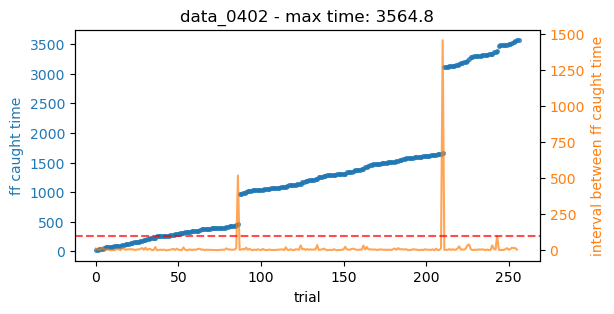

all_monkey_data/raw_monkey_data/monkey_Schro/data_0403
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0403/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0403/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


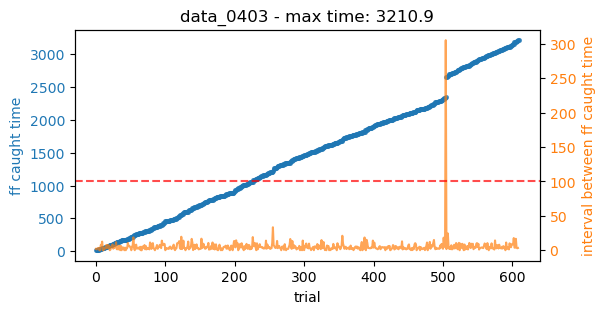

all_monkey_data/raw_monkey_data/monkey_Schro/data_0404
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0404/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0404/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


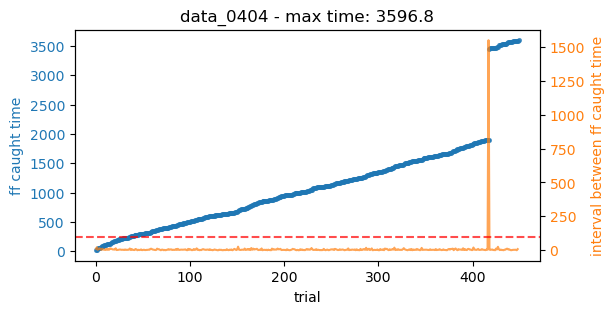

all_monkey_data/raw_monkey_data/monkey_Schro/data_0406
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0406/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0406/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


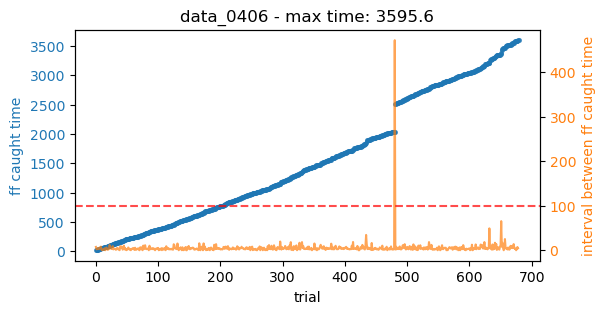

all_monkey_data/raw_monkey_data/monkey_Schro/data_0409
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0409/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0409/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


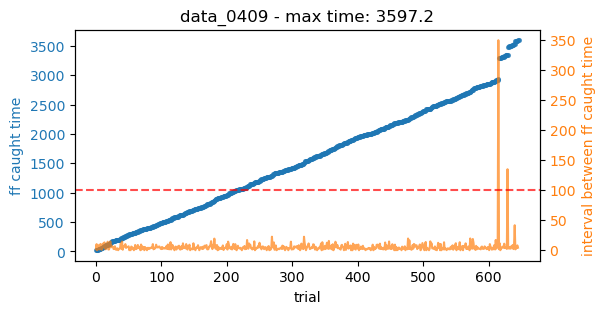

all_monkey_data/raw_monkey_data/monkey_Schro/data_0410
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0410/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0410/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


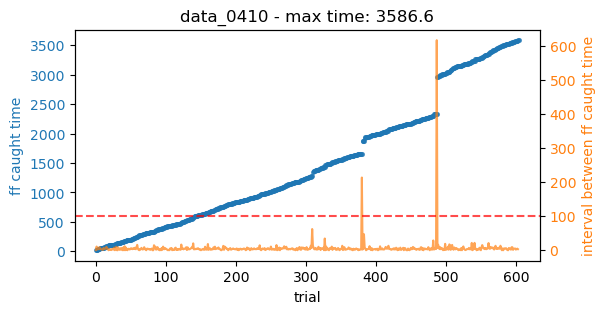

all_monkey_data/raw_monkey_data/monkey_Schro/data_0411
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0411/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0411/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


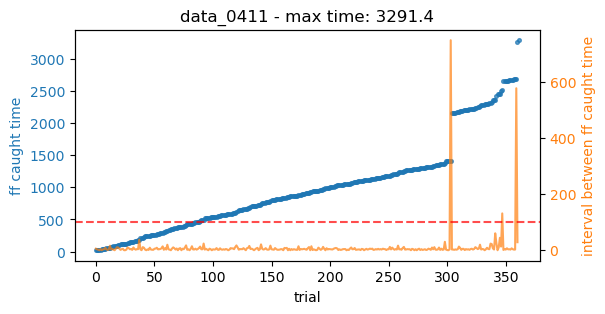

all_monkey_data/raw_monkey_data/monkey_Schro/data_0412
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0412/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0412/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


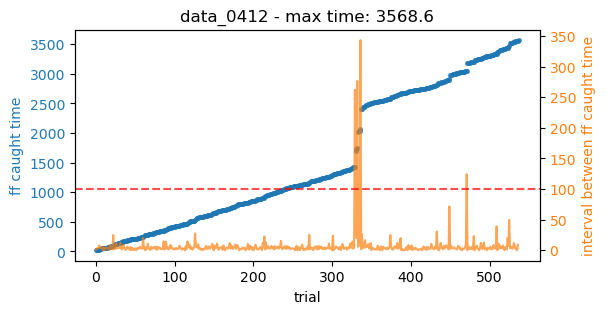

all_monkey_data/raw_monkey_data/monkey_Schro/data_0413
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0413/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0413/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


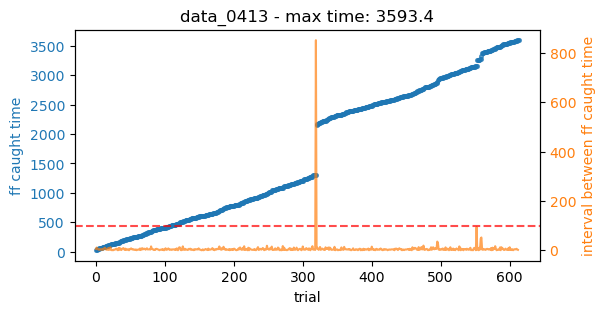

all_monkey_data/raw_monkey_data/monkey_Schro/data_0416
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0416/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


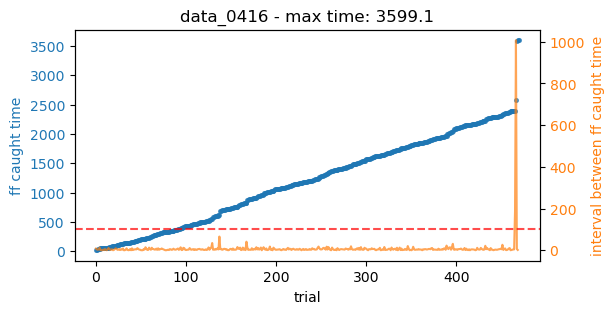

all_monkey_data/raw_monkey_data/monkey_Schro/data_0417
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0417/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0417/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


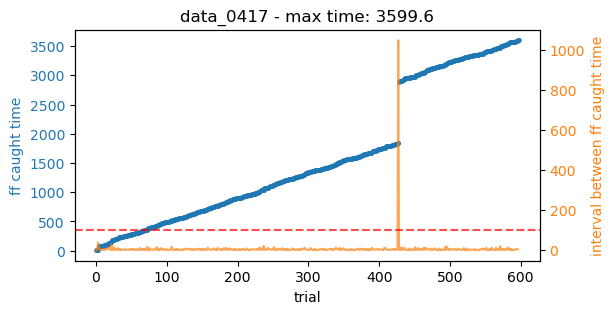

all_monkey_data/raw_monkey_data/monkey_Schro/data_0419
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0419/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0419/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


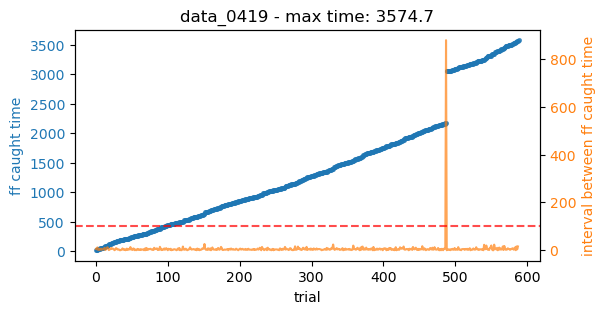

all_monkey_data/raw_monkey_data/monkey_Schro/data_0420
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0420/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0420/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


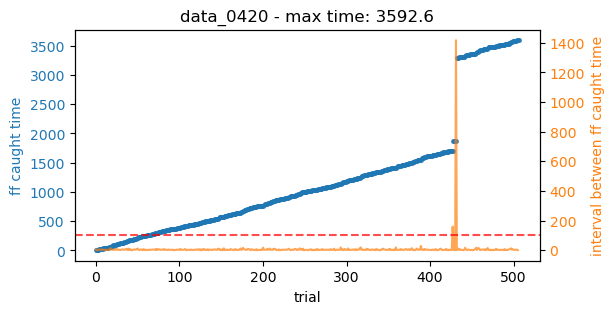

all_monkey_data/raw_monkey_data/monkey_Schro/data_0423
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0423/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0423/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


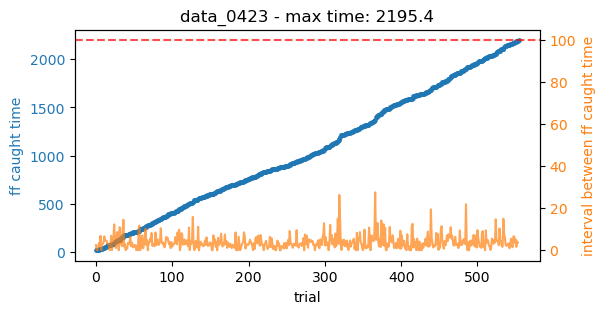

all_monkey_data/raw_monkey_data/monkey_Schro/data_0424
Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0424/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0424/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


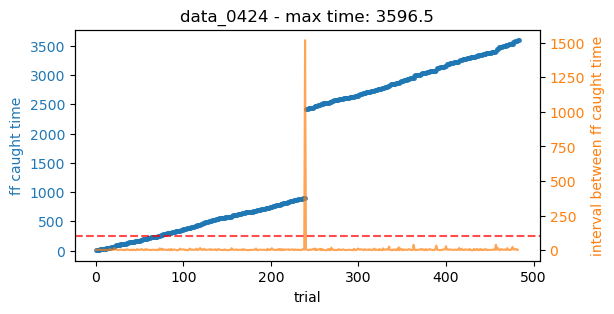

In [23]:
additional_plots.plot_ff_caught_time(monkey_name='monkey_Schro')